# FIFA World Cup Matches Analysis

In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [283]:
import plotly as py
import cufflinks as cf

In [284]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [285]:
from plotly.offline import iplot

In [286]:
world_cups = pd.read_csv('D:/Data Science/Data Visualization/DataVisualization/EDA of FIFA World Cup Matches/WorldCups.csv')
players =  pd.read_csv('D:/Data Science/Data Visualization/DataVisualization/EDA of FIFA World Cup Matches/WorldCupPlayers.csv')
matches =  pd.read_csv('D:/Data Science/Data Visualization/DataVisualization/EDA of FIFA World Cup Matches/WorldCupMatches.csv')

In [287]:
world_cups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [288]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [289]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


### Data Cleaning

In [290]:
matches.dropna(inplace=True)

In [291]:
matches['Home Team Name'].value_counts()

Brazil        82
Italy         57
Argentina     54
Germany FR    43
England       35
              ..
Serbia         1
Bolivia        1
Haiti          1
China PR       1
Angola         1
Name: Home Team Name, Length: 78, dtype: int64

In [292]:
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

rn">Republic of Ireland       5
rn">Trinidad and Tobago       1
rn">Bosnia and Herzegovina    1
rn">United Arab Emirates      1
rn">Serbia and Montenegro     1
Name: Home Team Name, dtype: int64

In [293]:
names.index

Index(['rn">Republic of Ireland', 'rn">Trinidad and Tobago',
       'rn">Bosnia and Herzegovina', 'rn">United Arab Emirates',
       'rn">Serbia and Montenegro'],
      dtype='object')

In [294]:
wrong = list(names.index)
wrong

['rn">Republic of Ireland',
 'rn">Trinidad and Tobago',
 'rn">Bosnia and Herzegovina',
 'rn">United Arab Emirates',
 'rn">Serbia and Montenegro']

In [295]:
correct = [name.split('>')[1]for name in wrong]
correct

['Republic of Ireland',
 'Trinidad and Tobago',
 'Bosnia and Herzegovina',
 'United Arab Emirates',
 'Serbia and Montenegro']

In [296]:
old = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana']
new = ['Germany', 'Maracanã Stadium', 'Maracanã Stadium']

In [297]:
wrong = wrong + old
correct = correct + new

In [298]:
for index,wr in enumerate(wrong):
    world_cups = world_cups.replace(wrong[index],correct[index])
for index,wr in enumerate(wrong):
    players = players.replace(wrong[index],correct[index])
for index,wr in enumerate(wrong):
    matches = matches.replace(wrong[index],correct[index])

In [299]:
names = matches[matches['Home Team Name'].str.contains('rn">')].value_counts()
names

Series([], dtype: int64)

In [300]:
world_cups.columns

Index(['Year', 'Country', 'Winner', 'Runners-Up', 'Third', 'Fourth',
       'GoalsScored', 'QualifiedTeams', 'MatchesPlayed', 'Attendance'],
      dtype='object')

### Winner,Second,third

In [301]:
winner = world_cups['Winner'].value_counts()
second = world_cups['Runners-Up'].value_counts()
third = world_cups['Third'].value_counts()

In [302]:
teams = pd.concat([winner,second,third],axis=1)
teams.iplot(kind='bar')

### Countrywise Total Goals

In [303]:
matches.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

In [304]:
home = matches[['Home Team Name','Home Team Goals']].dropna()
away = matches[['Away Team Name', 'Away Team Goals']].dropna()

In [305]:
home.columns = ['Countries','Goals']
away.columns = home.columns

In [306]:
goals = home.append(away,ignore_index=True)
goals

,Countries,Goals
0,France,4.0
1,USA,3.0
2,Yugoslavia,2.0
3,Romania,3.0
4,Argentina,1.0
...,...,...
1695,Costa Rica,0.0
1696,Germany,7.0
1697,Argentina,0.0
1698,Netherlands,3.0


In [307]:
goals = goals.groupby('Countries').sum().sort_values(by='Goals',ascending=False)
goals

,Goals
Countries,
Germany,231.0
Brazil,225.0
Argentina,133.0
Italy,128.0
France,108.0
...,...
Dutch East Indies,0.0
China PR,0.0
Trinidad and Tobago,0.0


In [308]:
goals.head(20).iplot(kind='bar',xTitle='Countries',yTitle='Goals')

In [309]:
world_cups['Attendance'] =world_cups['Attendance'].str.replace(".","").astype(int)
#type(int(world_cups['Attendance'][0]))  #'''int(world_cups['Attendance'])'''

In [310]:
world_cups.head(1)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549


### Year Vs Attendance

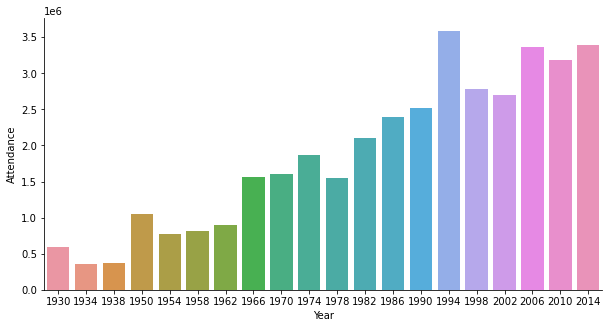

In [311]:
fig,ax = plt.subplots(figsize=(10,5))
sns.despine(right=True)
g = sns.barplot(x='Year',y='Attendance',data=world_cups)

### Year Vs GoalsScored

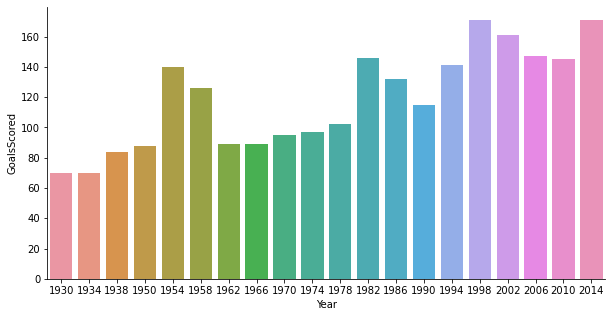

In [312]:
fig,ax = plt.subplots(figsize=(10,5))
sns.despine(right=True)
g = sns.barplot(x='Year',y='GoalsScored',data=world_cups)

### Year Vs MatchesPlayed

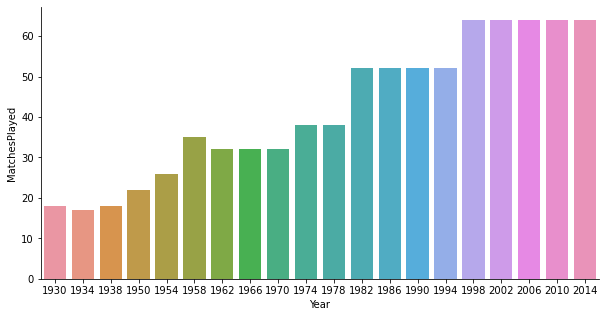

In [313]:
fig,ax = plt.subplots(figsize=(10,5))
sns.despine(right=True)
g = sns.barplot(x='Year',y='MatchesPlayed',data=world_cups)

### Year Vs QualifiedTeams

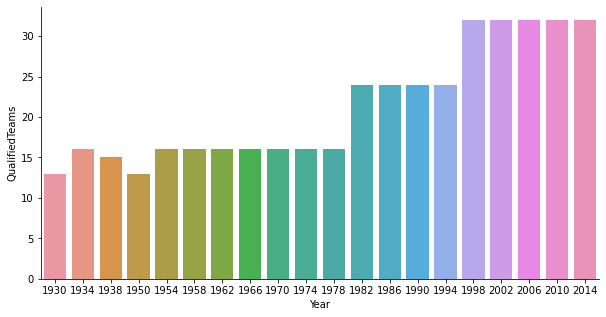

In [314]:
fig,ax = plt.subplots(figsize=(10,5))
sns.despine(right=True)
g = sns.barplot(x='Year',y='QualifiedTeams',data=world_cups)

### Goals Per Team Per World Cup

In [315]:
matches.head(1)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX


In [316]:
home = matches.groupby(['Year','Home Team Name'])['Home Team Goals'].sum()
home.head()

Year    Home Team Name
1930.0  Argentina         16.0
        Brazil             4.0
        Chile              4.0
        France             4.0
        Paraguay           1.0
Name: Home Team Goals, dtype: float64

In [317]:
away = matches.groupby(['Year','Away Team Name'])['Away Team Goals'].sum()
away.head()

Year    Away Team Name
1930.0  Argentina         2.0
        Belgium           0.0
        Bolivia           0.0
        Brazil            1.0
        Chile             1.0
Name: Away Team Goals, dtype: float64

In [318]:
goals = pd.concat([home,away],axis=1)
goals.fillna(0,inplace=True)
goals['Goals'] = goals['Home Team Goals']+ goals['Away Team Goals']
goals = goals.drop(labels = ['Home Team Goals','Away Team Goals'],axis=1)


In [319]:
goals = goals.reset_index()
goals.columns = ['Year','Country','Goals']

goals = goals.sort_values(by=['Year','Goals'],ascending=[True,False])
goals.head()

,Year,Country,Goals
0,1930.0,Argentina,18.0
11,1930.0,Uruguay,15.0
10,1930.0,USA,7.0
12,1930.0,Yugoslavia,7.0
3,1930.0,Brazil,5.0


In [320]:
top5 = goals.groupby(['Year']).head(5)
top5.head()

,Year,Country,Goals
0,1930.0,Argentina,18.0
11,1930.0,Uruguay,15.0
10,1930.0,USA,7.0
12,1930.0,Yugoslavia,7.0
3,1930.0,Brazil,5.0


In [321]:
import plotly.graph_objects as go

In [322]:
data = []

for team in top5['Country'].drop_duplicates().values:
    year = top5[top5['Country'] == team]['Year']
    goal = top5[top5['Country'] == team]['Goals']
    
    data.append(go.Bar(x = year, y = goal, name = team))
    
layout = go.Layout(barmode = 'stack', title = 'Top 5 Teams with Most Goals', showlegend = False)

fig = go.Figure(data = data, layout = layout)
fig.show()

### Highest No Of Attendance

In [323]:
matches.head(1)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX


In [324]:
matches['Datetime'] = pd.to_datetime(matches['Datetime'])

matches['Datetime'] = matches['Datetime'].apply(lambda x : x.strftime('%d %b, %Y'))

In [325]:
top10 = matches.sort_values(by=['Attendance'],ascending=False).head(10)
top10['Vs'] = top10['Home Team Name']+' Vs '+top10['Away Team Name']
top10

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Vs
74,1950.0,"16 Jul, 1950",Group 6,Maracanã Stadium,Rio De Janeiro,Uruguay,2.0,1.0,Brazil,,...,0.0,0.0,READER George (ENG),ELLIS Arthur (ENG),MITCHELL George (SCO),209.0,1190.0,URU,BRA,Uruguay Vs Brazil
71,1950.0,"13 Jul, 1950",Group 6,Maracanã Stadium,Rio De Janeiro,Brazil,6.0,1.0,Spain,,...,3.0,0.0,LEAFE Reginald (ENG),MITCHELL George (SCO),DA COSTA VIEIRA Jose (POR),209.0,1186.0,BRA,ESP,Brazil Vs Spain
63,1950.0,"01 Jul, 1950",Group 1,Maracanã Stadium,Rio De Janeiro,Brazil,2.0,0.0,Yugoslavia,,...,1.0,0.0,GRIFFITHS Benjamin (WAL),BERANEK Alois (AUT),DA COSTA VIEIRA Jose (POR),208.0,1191.0,BRA,YUG,Brazil Vs Yugoslavia
70,1950.0,"09 Jul, 1950",Group 6,Maracanã Stadium,Rio De Janeiro,Brazil,7.0,1.0,Sweden,,...,3.0,0.0,ELLIS Arthur (ENG),GARCIA Prudencio (USA),DE LA SALLE Charles (FRA),209.0,1189.0,BRA,SWE,Brazil Vs Sweden
379,1986.0,"07 Jun, 1986",Group B,Estadio Azteca,Mexico City,Mexico,1.0,1.0,Paraguay,,...,1.0,0.0,COURTNEY George (ENG),FREDRIKSSON Erik (SWE),IGNA Ioan (ROU),308.0,680.0,MEX,PAR,Mexico Vs Paraguay
411,1986.0,"29 Jun, 1986",Final,Estadio Azteca,Mexico City,Argentina,3.0,2.0,Germany,,...,1.0,0.0,ARPPI FILHO Romualdo (BRA),FREDRIKSSON Erik (SWE),ULLOA MORERA Berny (CRC),3467.0,393.0,ARG,FRG,Argentina Vs Germany
397,1986.0,"15 Jun, 1986",Round of 16,Estadio Azteca,Mexico City,Mexico,2.0,0.0,Bulgaria,,...,1.0,0.0,ARPPI FILHO Romualdo (BRA),MENDEZ MOLINA Romulo (GUA),IGNA Ioan (ROU),309.0,463.0,MEX,BUL,Mexico Vs Bulgaria
407,1986.0,"22 Jun, 1986",Quarter-finals,Estadio Azteca,Mexico City,Argentina,2.0,1.0,England,,...,0.0,0.0,BENNACEUR Ali (TUN),ULLOA MORERA Berny (CRC),DOTCHEV Bogdan (BUL),714.0,392.0,ARG,ENG,Argentina Vs England
409,1986.0,"25 Jun, 1986",Semi-finals,Estadio Azteca,Mexico City,Argentina,2.0,0.0,Belgium,,...,0.0,0.0,MARQUEZ RAMIREZ Antonio (MEX),MENDEZ MOLINA Romulo (GUA),SILVA VALENTE Carlos Alberto (POR),3469.0,388.0,ARG,BEL,Argentina Vs Belgium
367,1986.0,"03 Jun, 1986",Group B,Estadio Azteca,Mexico City,Belgium,1.0,2.0,Mexico,,...,1.0,2.0,ESPOSITO Carlos (ARG),SILVA VALENTE Carlos Alberto (POR),MENDEZ MOLINA Romulo (GUA),308.0,428.0,BEL,MEX,Belgium Vs Mexico


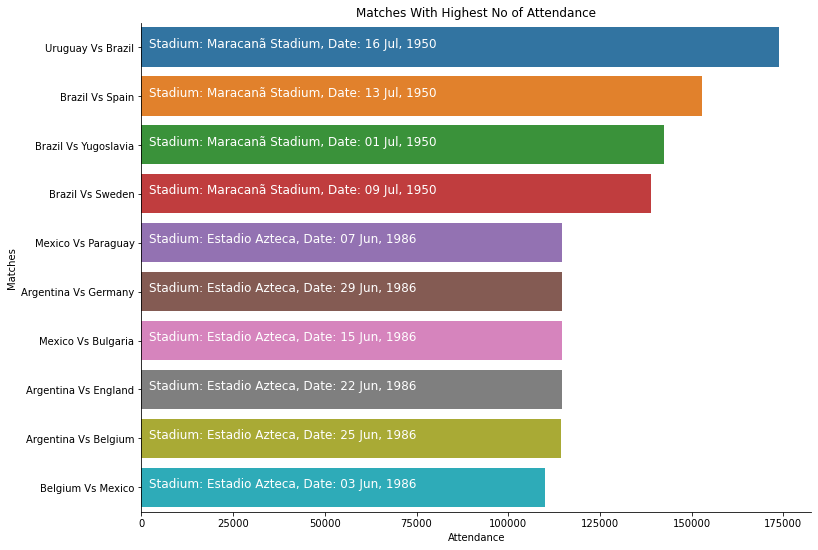

In [326]:
plt.figure(figsize=(12,9))

ax = sns.barplot(x='Attendance',y='Vs',data=top10)
plt.xlabel('Attendance')
plt.ylabel('Matches')
plt.title('Matches With Highest No of Attendance')
sns.despine(right=True)

for i,s in enumerate("Stadium: "+top10['Stadium']+", Date: "+top10['Datetime']):
    ax.text(2000,i,s,fontsize=12,color='white')
    
plt.show()

### Stadium wise Mean Attendance

In [327]:
std = matches.groupby(['Stadium','City'])['Attendance'].mean().reset_index().sort_values(by='Attendance',ascending=False).head(10)
std

,Stadium,City,Attendance
32,Estadio Azteca,Mexico City,100923.684211
136,Rose Bowl,Los Angeles,92600.875000
178,Wembley Stadium,London,86448.222222
98,Maracanã Stadium,Rio De Janeiro,86417.333333
150,Soccer City Stadium,Johannesburg,83857.375000
145,Santiago Bernabeu,Madrid,82522.250000
166,Stanford Stadium,San Francisco,81737.333333
158,Stade de France,Saint-Denis,78222.222222
63,Giants Stadium,New York/New Jersey,73689.714286
163,Stadio Olimpico,Rome,73373.000000


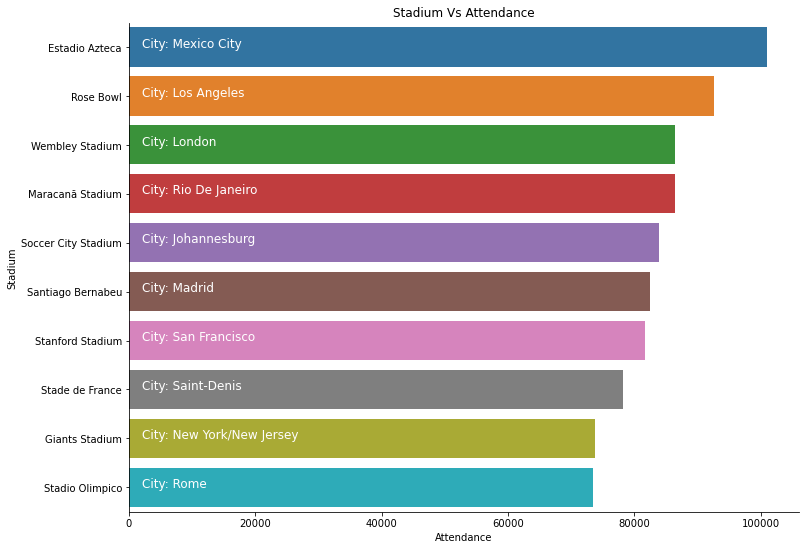

In [328]:
plt.figure(figsize=(12,9))
ax = sns.barplot(x='Attendance',y='Stadium',data=std)
sns.despine(right=True)
plt.xlabel('Attendance')
plt.ylabel('Stadium')
plt.title('Stadium Vs Attendance')

for i,s in enumerate("City: "+std['City']):
    ax.text(2000,i,s,fontsize=12,color='white')
    
plt.show()

### No of matches Played in City

In [329]:
matches['City'].value_counts().head(15).iplot(kind='bar')

### Matches Outcomes By Home And Away Teams

In [330]:
def get_labels(matches):
    if matches['Home Team Goals'] > matches['Away Team Goals']:
        return 'Home Team Goals'
    if matches['Home Team Goals'] < matches['Away Team Goals']:
        return 'Away Team Goals'
    else:
        return 'DRAW'

In [331]:
matches['Outcomes'] = matches.apply(lambda x : get_labels(x),axis=1)

In [332]:
mt = matches['Outcomes'].value_counts()
mt

Home Team Goals    486
DRAW               190
Away Team Goals    174
Name: Outcomes, dtype: int64

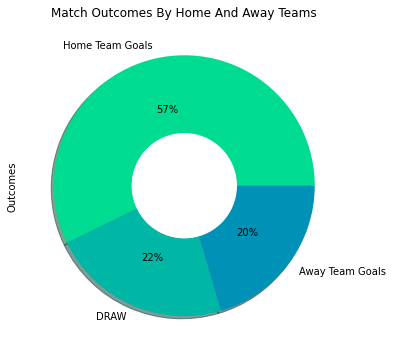

In [333]:
plt.figure(figsize=(6,6))
mt.plot.pie(autopct="%1.0f%%",colors= sns.color_palette('winter_r'),shadow=True)
c = plt.Circle((0,0),radius=0.4,color='white')
plt.gca().add_artist(c)
plt.title("Match Outcomes By Home And Away Teams")
plt.show()